# Using the OmicsIntegrator Package

In [2]:
%matplotlib inline
import numpy as np
import pandas as pd
import networkx as nx

import OmicsIntegrator as oi

In [3]:
interactome_file = "../interactomes/inbiomap.9.12.2016.exp.oi2"
prize_file = "./example_prizes.tsv"
graph = oi.Graph(interactome_file, {'g':5})

In [4]:
graph.prepare_prizes(prize_file)

03:34:09 - OI2: INFO - Duplicated gene symbols in the prize file (we'll keep the max prize):
03:34:09 - OI2: INFO - ['TGFB1']
03:34:09 - OI2: INFO - Members of the prize file not present in the interactome:
03:34:09 - OI2: INFO - ['AIM1', 'APOL3', 'ATP6V0E1', 'CXorf36', 'FAM198B', 'FAM63B', 'GLT25D1', 'NORAD', 'PRR29', 'RP6-99M1.2', 'TNFSF4']
/Users/alex/miniconda3/envs/oi2/lib/python3.10/site-packages/OmicsIntegrator/graph.py:196: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  self.node_attributes["prize"].fillna(0, inplace=Tr

In [5]:
vertex_indices, edge_indices = graph.pcsf()

In [6]:
len(vertex_indices)

87

In [7]:
forest, augmented_forest = graph.output_forest_as_networkx(vertex_indices, edge_indices)
forest

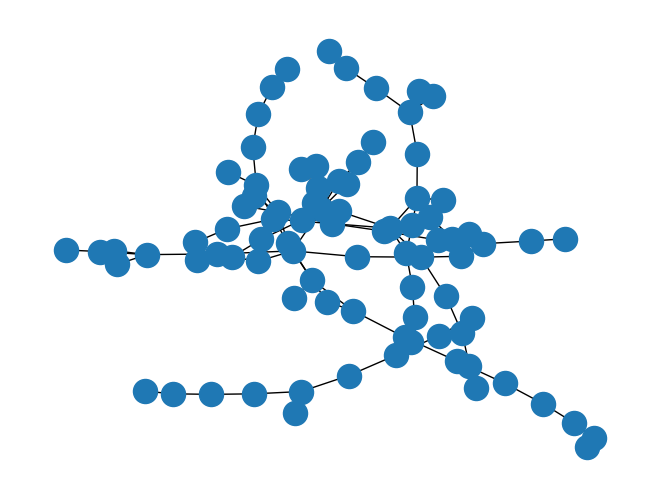

In [8]:
nx.draw_spring(augmented_forest)

In [9]:
graph.pcsf_objective_value(forest)

636.9675613260696

In [10]:
oi.get_networkx_graph_as_dataframe_of_nodes(augmented_forest).head()

,prize,Base_Mean,log2FC,StdErr,Wald_Stats,P_value,P_adj,terminal,type,degree,betweenness,louvain_clusters,location,general_process,specific_process,general_function,specific_function
UBE2L6,1.635096,3073.46619,-1.420584,0.051655,27.501238,1.696810e-166,3.093079e-164,True,protein,49,0.000000,0,nucleus,metabolic process,nitrogen compound metabolic process,binding,protein binding
GPC6,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,False,protein,12,0.045964,1,plasma_membrane,metabolic process,organic substance metabolic process,binding,protein binding
BACE1,1.243755,1469.98130,2.035023,0.084830,-23.989391,3.588534e-127,4.212063e-125,True,protein,24,0.068126,2,golgi,metabolic process,nitrogen compound metabolic process,catalytic,hydrolase
CSF2RB,3.100000,1754.63932,-2.856679,0.075458,37.857735,1.000000e-309,1.000000e-310,True,protein,23,0.144313,3,plasma_membrane,cellular process,cellular response to stimulus,molecular transducer,signaling receptor
JAK1,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,False,protein,84,0.154356,3,plasma_membrane,biological regulation,regulation of biological process,binding,protein binding


In [11]:
oi.output_networkx_graph_as_interactive_html(augmented_forest, output_dir='/Users/alex/Desktop/')

PosixPath('/Users/alex/Desktop/graph.html')